In [49]:
import sys, os, time, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
dir_name = '/home/gidumah/ytopt_project/'
kernel_rf = 'qmcpack/'

d_sizes = ['S8', 'S32', 'S128']

obj_rf = {}
for s in d_sizes:
    rates = pd.read_csv(f'{dir_name}{kernel_rf}{s}_problem.csv')['objective']
    obj_rf[s] = rates * -1

In [51]:
gathered = []

d_sizes = ['S8', 'S32', 'S128']


for d_size in d_sizes:
    
    t = 0
    evals = []
    
    kernel_rf = 'qmcpack/'
    file_rf = f'{dir_name}{kernel_rf}{d_size}_problem.csv'
    evals_rf = np.array(pd.read_csv(file_rf)['objective'])
    evals_rf *= -1
    n_rf = len(evals_rf)
    T_rf = np.array(pd.read_csv(file_rf)['elapsed_sec'])
    evals.extend(evals_rf)
    plot_rf = []
    best_rf = 0
    idx_rf = 0
    t_rf = T_rf[idx_rf] # picks the elapsed time
    
    
    T_max = int(max(T_rf))

     
    
    while t < T_max:
        try:
            if t_rf < t and idx_rf <= n_rf-1:
                rf_tmp = float(evals_rf[idx_rf])
                if rf_tmp > best_rf:
                    best_rf = rf_tmp
                plot_rf.append(best_rf)
                idx_rf += 1
                if idx_rf <= n_rf-1:
                    t_rf = T_rf[idx_rf]
            elif idx_rf == n_rf or best_rf == 0:
                pass
            else:
                plot_rf.append(best_rf)
        except IndexError:
            pass
        
        t += 1
        
    cc = {}
    cc['rf'] = plot_rf
#     cc['dummy'] = plot_dummy
    
    gathered.append(cc)

In [52]:
baselines = [48.93328475427091, 3.195653910681473, 0.12403870007442322]

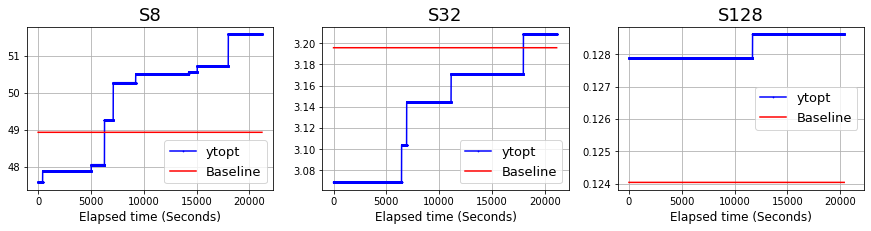

In [54]:
fig, axs = plt.subplots(1,3, figsize=(15, 3), sharex=True, sharey=False)
BEST = []

d_sizes = ['S8', 'S32', 'S128']

for ax, cc, d_size, baseline in zip(axs.flat, gathered, d_sizes, baselines):
    
    dict_s = cc
    
    for k, v in dict_s.items():    
        if k == 'rf':
            k = 'ytopt'
            color = 'blue'
            
        if k == 'dummy':
            k = 'Random Search'
            color = 'orange'
    
        BEST.append(v[-1])
        ax.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
        
    ax.plot(range(1, len(v) + 1), baseline*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
    ax.legend(fontsize=13)


#     ax.set_ylabel('Best speedup so far', fontsize=12)
    ax.set_xlabel('Elapsed time (Seconds)', fontsize=12)
    ax.set_title(d_size, fontsize=18)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    ax.grid()